<a href="https://colab.research.google.com/github/JordanKingPeru/ms_data_science/blob/main/Extracci%C3%B3n%20Patrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install https://bit.ly/3o4smsZ

  Using cached https://bit.ly/3o4smsZ
  Created wheel for fim: filename=fim-6.27-cp36-cp36m-linux_x86_64.whl size=522725 sha256=b2c4737938f48ff9c2fb4eec3321ad36525f55c4bb69d58980b4ce24756d9d41
  Stored in directory: /tmp/pip-ephem-wheel-cache-9t0b6pay/wheels/2a/ec/63/3ccb935ec6cdd2af71f8823f3ebed3c33664fdebae39cef204
Successfully built fim


In [ ]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import time

In [ ]:
url = "https://bit.ly/37ObeBK"
df = pd.read_csv(url)
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [ ]:
df.shape

(315, 7)

In [ ]:
help(eclat)

Help on built-in function eclat in module fim:

eclat(...)
    eclat (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
           eval='x', agg='x', thresh=10, prune=None, algo='a', mode='',
           border=None)
    Find frequent item sets with the Eclat algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an item set     

In [ ]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [ ]:
eclat(df.iloc[:,:].values, target='a', supp=20)

[((nan,), 274),
 (('Bread', nan), 125),
 (('Bread',), 159),
 (('Milk', nan), 129),
 (('Milk', 'Bread'), 88),
 (('Milk',), 158),
 (('Cheese', nan), 124),
 (('Cheese', 'Bread'), 75),
 (('Cheese', 'Milk', nan), 74),
 (('Cheese', 'Milk'), 96),
 (('Cheese',), 158),
 (('Meat', nan), 116),
 (('Meat', 'Bread'), 65),
 (('Meat', 'Milk'), 77),
 (('Meat', 'Cheese', nan), 74),
 (('Meat', 'Cheese', 'Milk'), 64),
 (('Meat', 'Cheese'), 102),
 (('Meat',), 150),
 (('Eggs', nan), 106),
 (('Eggs', 'Milk'), 77),
 (('Eggs', 'Cheese', nan), 69),
 (('Eggs', 'Cheese'), 94),
 (('Eggs', 'Meat', 'Cheese'), 68),
 (('Eggs', 'Meat'), 84),
 (('Eggs',), 138),
 (('Wine', nan), 100),
 (('Wine', 'Bread'), 77),
 (('Wine', 'Milk'), 69),
 (('Wine', 'Cheese'), 85),
 (('Wine', 'Meat'), 79),
 (('Wine', 'Eggs'), 76),
 (('Wine',), 138),
 (('Bagel', nan), 106),
 (('Bagel', 'Bread', nan), 67),
 (('Bagel', 'Bread'), 88),
 (('Bagel', 'Milk'), 71),
 (('Bagel',), 134),
 (('Diaper', nan), 100),
 (('Diaper', 'Bread'), 73),
 (('Diaper', 

In [ ]:
data = []
for i in range(df.shape[0]):
  row = df.iloc[i,:].values
  row = row[~pd.isnull(row)] #remover los nan/null de la fila i
  data += [row.tolist()]
data = np.array(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


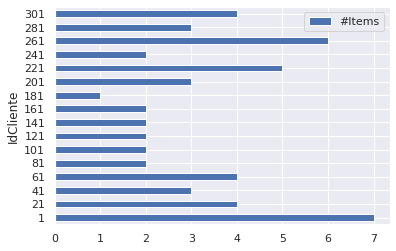

In [ ]:
paso = 20
trans = [(i+1, len(data[i])) for i in range(len(data)) if i % paso == 0]
df_trans = pd.DataFrame(trans)
df_trans.columns = ["IdCliente", "#Items"]
df_trans.plot.barh(x="IdCliente", y="#Items")

In [ ]:
trans_ = [(i+1, len(data[i])) for i in range(len(data))]
df_trans_ = pd.DataFrame(trans_)
df_trans_.columns = ["IdCliente", "#Items"]
df_trans_.groupby(["#Items"]).count()

,IdCliente
#Items,
1,30
2,40
3,58
4,54
5,62
6,30
7,41


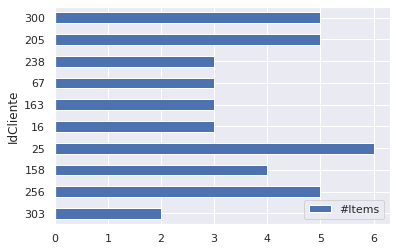

In [ ]:
df_trans_.sample(10).plot.barh(x="IdCliente", y="#Items")

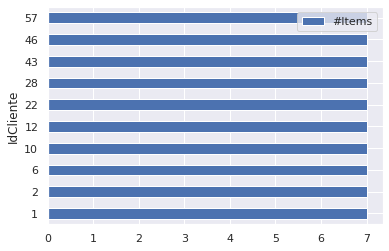

In [ ]:
df_trans_[df_trans_["#Items"] == df_trans_["#Items"].max()].iloc[:10,:].plot.barh(x="IdCliente", y="#Items")

In [ ]:
r = fpgrowth(data, target='a', supp=1, zmax=1)
r

[(('Cheese',), 158),
 (('Bread',), 159),
 (('Milk',), 158),
 (('Meat',), 150),
 (('Wine',), 138),
 (('Eggs',), 138),
 (('Bagel',), 134),
 (('Diaper',), 128),
 (('Pencil',), 114)]

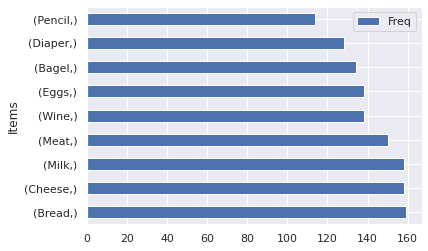

In [ ]:
df_items = pd.DataFrame(r)
df_items.columns = ["Items", "Freq"]
df_items.sort_values(by="Freq", ascending=False, inplace=True)
df_items.plot.barh(x="Items", y="Freq")

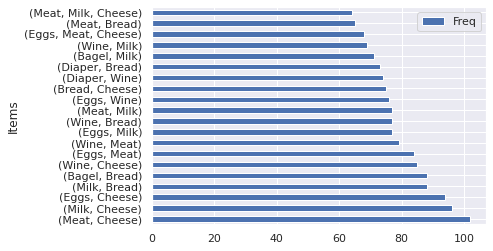

In [ ]:
r = fpgrowth(data, target='a', supp=10, zmin=2)
df_items = pd.DataFrame(r)
df_items.columns = ["Items", "Freq"]
df_items.sort_values(by="Freq", ascending=False, inplace=True)
df_items.iloc[:20,:].plot.barh(x="Items", y="Freq")

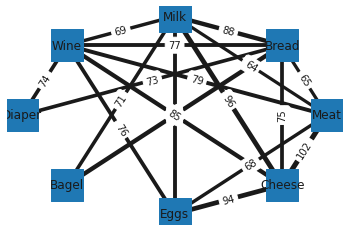

In [ ]:
import networkx as nx
G = nx.Graph()

df_ = df_items.iloc[:20,:]
l = []
e = {}
for i,row in df_.iterrows():
  c = str(row["Items"]).replace("(","").replace(")","").replace("'","").split(", ")
  e[(c[0],c[1])] = int(row["Freq"])
  l += c
l = set(l)

for i in l:
  G.add_node(i)
for j in e:
  G.add_edge(j[0], j[1], weight=e[j])

pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
edges = G.edges()
weights = [G[u][v]['weight'] / 20 for u,v in edges]
nx.draw_circular(G, node_size=1000, node_shape='s', with_labels = True, width = weights)